In [170]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

In [171]:
df = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Diwali Sales\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [172]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [173]:
df.drop(['Status', 'unnamed1'], axis=1, inplace = True)

In [174]:
df.dropna(inplace= True)

In [175]:
df['Amount'] = df['Amount'].astype('int')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [177]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

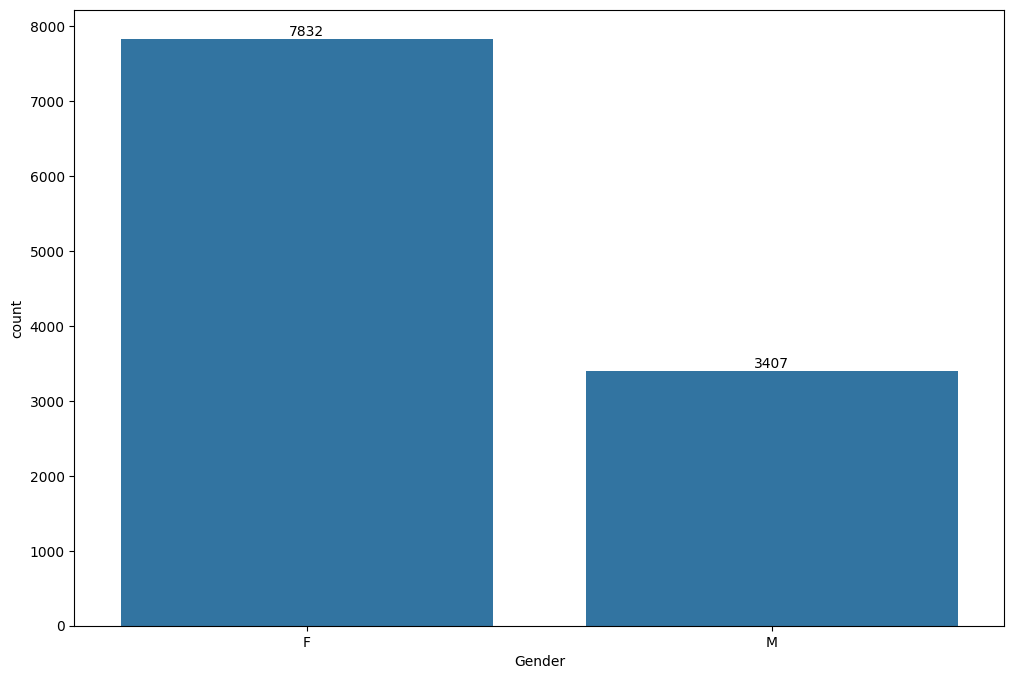

In [178]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

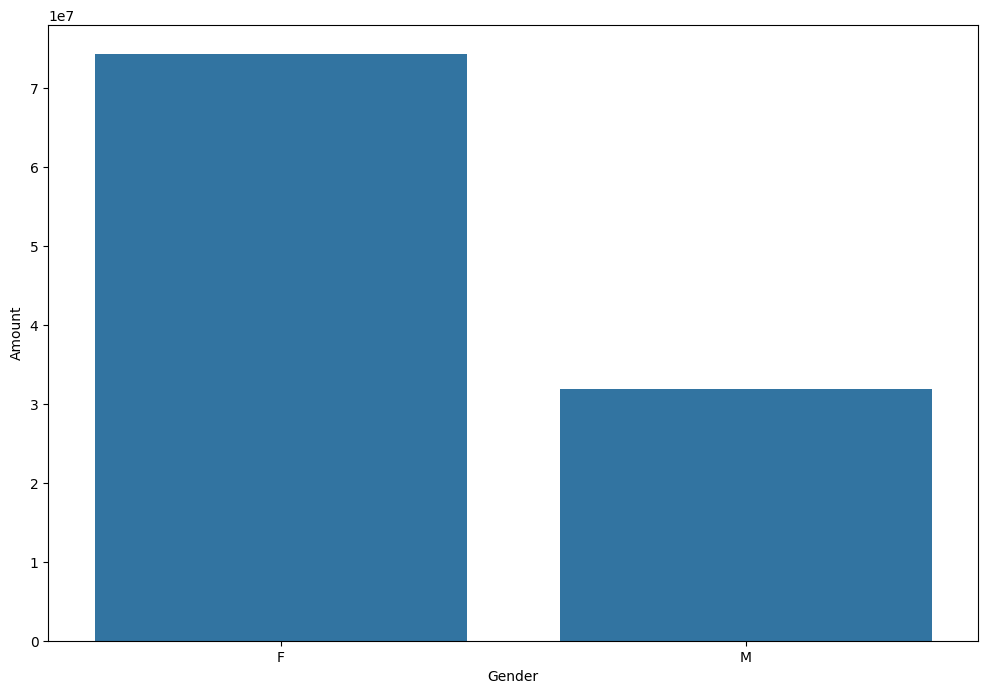

In [179]:
sales_graph = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = 'Gender',y = 'Amount', data = sales_graph)

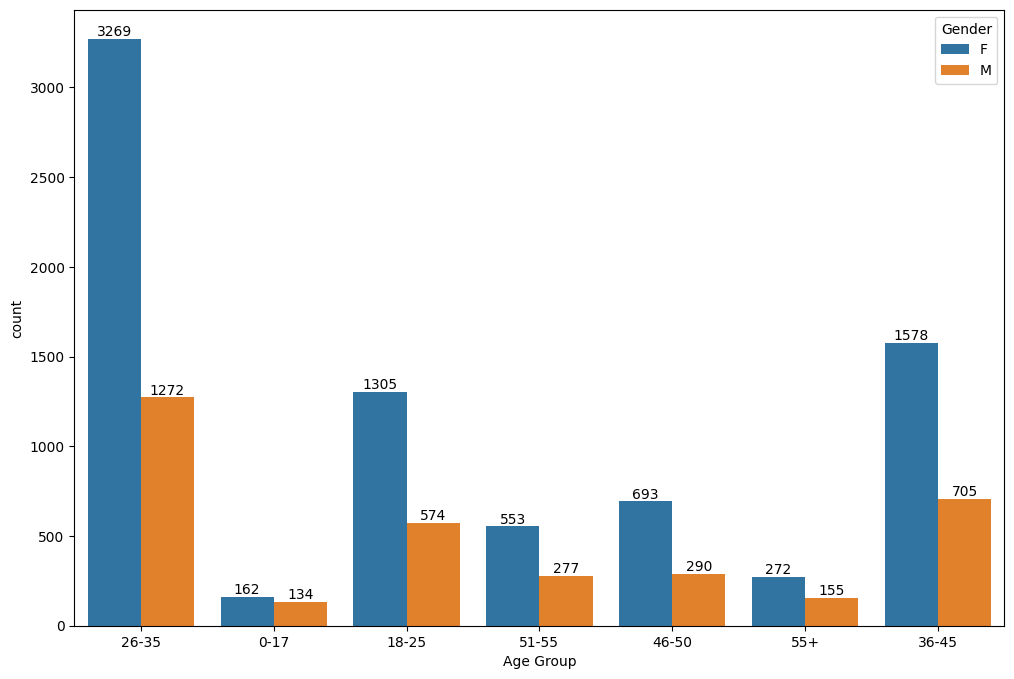

In [180]:
ax = sns.countplot(data = df,x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)


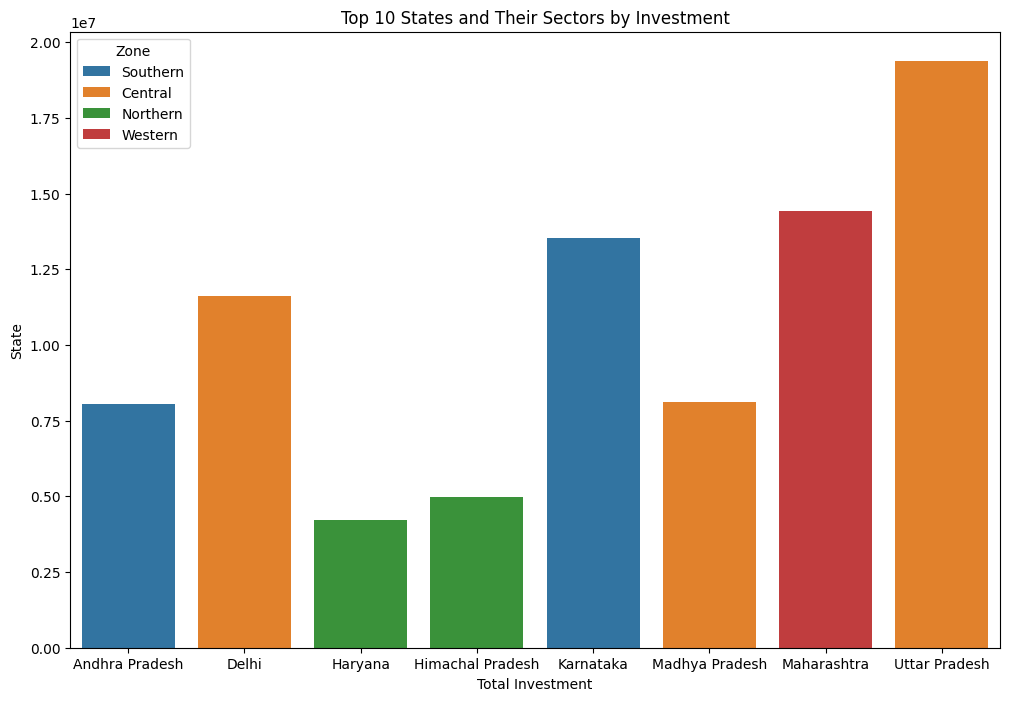

In [181]:
state_sector_investments = df.groupby(['State', 'Zone'])['Amount'].sum().reset_index()

top_8_states = state_sector_investments.groupby('State')['Amount'].sum().nlargest(8).index

top_8_states_data = state_sector_investments[state_sector_investments['State'].isin(top_8_states)]

plt.figure(figsize=(12, 8))
sns.barplot(y='Amount', x='State', hue='Zone', data=top_8_states_data)
plt.title('Top 10 States and Their Sectors by Investment')
plt.xlabel('Total Investment')
plt.ylabel('State')
plt.show()

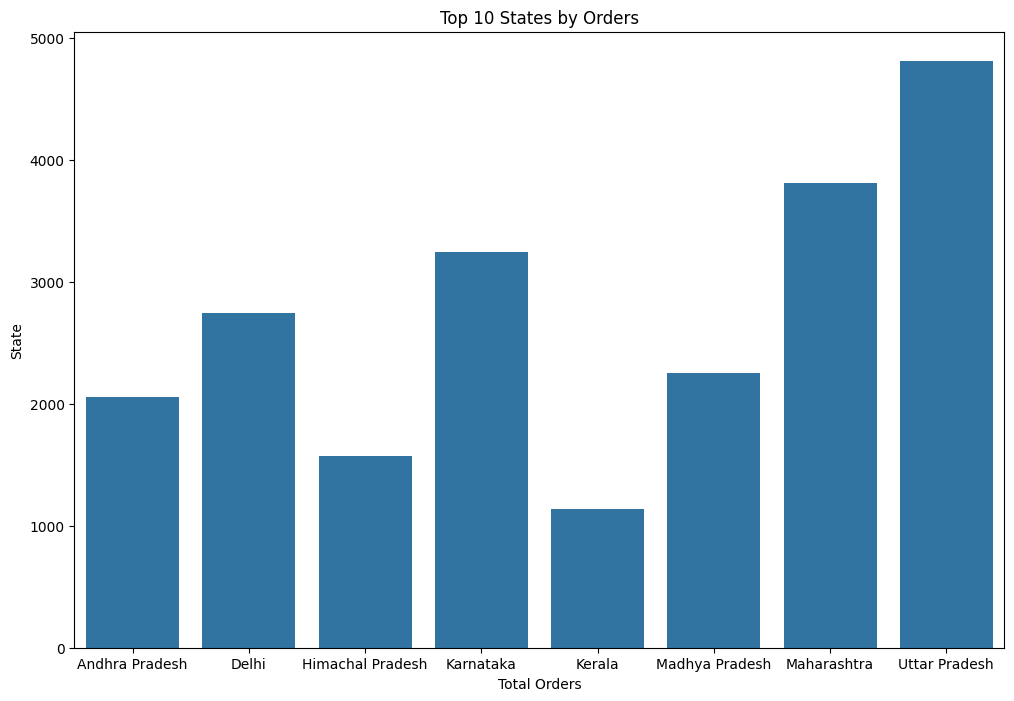

In [184]:
orders_state = df.groupby('State')['Orders'].sum().reset_index()
top_8_orders = orders_state.groupby('State')['Orders'].sum().nlargest(8).index
top_8_orders_data = orders_state[orders_state['State'].isin(top_8_orders)]

sns.barplot(x='State', y='Orders', data = top_8_orders_data)
plt.title('Top 10 States by Orders')
plt.xlabel('Total Orders')
plt.ylabel('State')
plt.show()